In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import image
from matplotlib import pyplot as plt
import os
from PIL import Image
from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
path = "/content/drive/Shared drives/Data Sci Lab Final Proj/adri's stuff/"

pokemon = pd.read_json(path + "pokemon_full.json")
pokemon.head()

,id,name,species,type,height,weight,abilities,stats,evolution,description,gen
0,1,Bulbasaur,Seed Pokemon,"[Grass, Poison]",2ft.4in. (0.71m),15.2 lbs (6.9 kg),"[Overgrow, Chlorophyll]","{'hp': 45, 'attack': 49, 'defense': 49, 'sp.at...","[Bulbasaur, Ivysaur, Venusaur]","For some time after its birth, it grows by gai...",1
1,2,Ivysaur,Seed Pokemon,"[Grass, Poison]",3ft.3in. (0.99m),28.7 lbs (13.0 kg),"[Overgrow, Chlorophyll]","{'hp': 60, 'attack': 62, 'defense': 63, 'sp.at...","[Bulbasaur, Ivysaur, Venusaur]","When the bud on its back starts swelling, a sw...",1
2,3,Venusaur,Seed Pokemon,"[Grass, Poison]",6ft.7in. (2.01m),220.5 lbs (100.0 kg),"[Overgrow, Chlorophyll]","{'hp': 80, 'attack': 82, 'defense': 83, 'sp.at...","[Bulbasaur, Ivysaur, Venusaur]","After a rainy day, the flower on its back smel...",1
3,4,Charmander,Lizard Pokemon,[Fire],2ft.0in. (0.61m),18.7 lbs (8.5 kg),"[Blaze, Solar Power]","{'hp': 39, 'attack': 52, 'defense': 43, 'sp.at...","[Charmander, Charmeleon, Charizard]",The fire on the tip of its tail is a measure o...,1
4,5,Charmeleon,Flame Pokemon,[Fire],3ft.7in. (1.09m),41.9 lbs (19.0 kg),"[Blaze, Solar Power]","{'hp': 58, 'attack': 64, 'defense': 58, 'sp.at...","[Charmander, Charmeleon, Charizard]","In the rocky mountains where Charmeleon live, ...",1


In [0]:
def load_images(folder):
    images = []
    for filename in sorted(os.listdir(folder)):
        data = image.imread(folder+filename)
        images.append(data)
    return images

float32
(215, 215, 4)


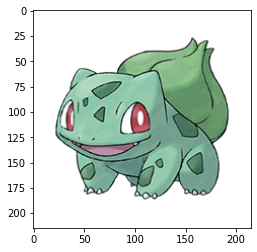

In [0]:
imgs = load_images(path + "pokemons/")

data = imgs[0]
print(data.dtype)
print(data.shape)
plt.imshow(data)
plt.show()

In [0]:
#if a pokemon has more than one type, duplicate it and add it to the test set under 
#its second type
new_pokemon = []
new_im = []
for i in range(len(pokemon)):
    p = pokemon.iloc[i]
    if len(p["type"]) > 1:
        t2 = p["type"][1]
        p2 = pd.DataFrame.copy(p)
        p2["type"] = t2
        new_pokemon.append(p2)  
        im = imgs[i]  
        new_im.append(im)
    t = p["type"][0]
    pokemon.at[i, 'type'] = t
        
new_df = pd.DataFrame(new_pokemon)
new_df.head()

,id,name,species,type,height,weight,abilities,stats,evolution,description,gen
0,1,Bulbasaur,Seed Pokemon,Poison,2ft.4in. (0.71m),15.2 lbs (6.9 kg),"[Overgrow, Chlorophyll]","{'hp': 45, 'attack': 49, 'defense': 49, 'sp.at...","[Bulbasaur, Ivysaur, Venusaur]","For some time after its birth, it grows by gai...",1
1,2,Ivysaur,Seed Pokemon,Poison,3ft.3in. (0.99m),28.7 lbs (13.0 kg),"[Overgrow, Chlorophyll]","{'hp': 60, 'attack': 62, 'defense': 63, 'sp.at...","[Bulbasaur, Ivysaur, Venusaur]","When the bud on its back starts swelling, a sw...",1
2,3,Venusaur,Seed Pokemon,Poison,6ft.7in. (2.01m),220.5 lbs (100.0 kg),"[Overgrow, Chlorophyll]","{'hp': 80, 'attack': 82, 'defense': 83, 'sp.at...","[Bulbasaur, Ivysaur, Venusaur]","After a rainy day, the flower on its back smel...",1
5,6,Charizard,Flame Pokemon,Flying,5ft.7in. (1.70m),199.5 lbs (90.5 kg),"[Blaze, Solar Power]","{'hp': 78, 'attack': 84, 'defense': 78, 'sp.at...","[Charmander, Charmeleon, Charizard]",It is said that Charizards fire burns hotter i...,1
11,12,Butterfree,Butterfly Pokemon,Flying,3ft.7in. (1.09m),70.5 lbs (32.0 kg),"[Compound Eyes, Tinted Lens]","{'hp': 60, 'attack': 45, 'defense': 50, 'sp.at...","[Caterpie, Metapod, Butterfree]",It loves the honey of flowers and can locate f...,1


In [0]:
for i, im in enumerate(new_im):
    imgs.append(im)

In [0]:
pokemon = pokemon.append(new_df, ignore_index=True)
pokemon.tail()

,id,name,species,type,height,weight,abilities,stats,evolution,description,gen
1199,795,Pheromosa,Lissome Pokemon,Fighting,(1.8m),(25 kg),[Beast Boost],"{'hp': 71, 'attack': 137, 'defense': 37, 'sp.a...",[],Description not available yet,7
1200,797,Celesteela,Launch Pokemon,Flying,(9.2m),(999.9 kg),[Beast Boost],"{'hp': 97, 'attack': 101, 'defense': 103, 'sp....",[],Description not available yet,7
1201,798,Kartana,Drawn Sword Pokemon,Steel,(0.3m),(0.1 kg),[Beast Boost],"{'hp': 59, 'attack': 181, 'defense': 131, 'sp....",[],Description not available yet,7
1202,799,Guzzlord,Junkivore Pokemon,Dragon,(5.5m),(888 kg),[Beast Boost],"{'hp': 223, 'attack': 101, 'defense': 53, 'sp....",[],Description not available yet,7
1203,801,Magearna,Artificial Pokemon,Fairy,(1m),(80.5 kg),[Soul-Heart],"{'hp': 80, 'attack': 95, 'defense': 115, 'sp.a...",[],Description not available yet,7


In [0]:
#now we have to numerically encode the data
u = np.unique(pokemon["type"])
enc = np.array([u, np.arange(0, len(u))])
types = pd.DataFrame(data=enc.T, index=np.arange(0, len(u)), columns=["type","num"])
print(types)

for i in range(len(pokemon)):
    t = pokemon.iloc[i]['type']
    pokemon.at[i, "type"] = types[types['type']==t].index.item()

        type num
0        Bug   0
1       Dark   1
2     Dragon   2
3   Electric   3
4      Fairy   4
5   Fighting   5
6       Fire   6
7     Flying   7
8      Ghost   8
9      Grass   9
10    Ground  10
11       Ice  11
12    Normal  12
13    Poison  13
14   Psychic  14
15      Rock  15
16     Steel  16
17     Water  17


In [0]:
pokemon.head(10)

,id,name,species,type,height,weight,abilities,stats,evolution,description,gen
0,1,Bulbasaur,Seed Pokemon,9,2ft.4in. (0.71m),15.2 lbs (6.9 kg),"[Overgrow, Chlorophyll]","{'hp': 45, 'attack': 49, 'defense': 49, 'sp.at...","[Bulbasaur, Ivysaur, Venusaur]","For some time after its birth, it grows by gai...",1
1,2,Ivysaur,Seed Pokemon,9,3ft.3in. (0.99m),28.7 lbs (13.0 kg),"[Overgrow, Chlorophyll]","{'hp': 60, 'attack': 62, 'defense': 63, 'sp.at...","[Bulbasaur, Ivysaur, Venusaur]","When the bud on its back starts swelling, a sw...",1
2,3,Venusaur,Seed Pokemon,9,6ft.7in. (2.01m),220.5 lbs (100.0 kg),"[Overgrow, Chlorophyll]","{'hp': 80, 'attack': 82, 'defense': 83, 'sp.at...","[Bulbasaur, Ivysaur, Venusaur]","After a rainy day, the flower on its back smel...",1
3,4,Charmander,Lizard Pokemon,6,2ft.0in. (0.61m),18.7 lbs (8.5 kg),"[Blaze, Solar Power]","{'hp': 39, 'attack': 52, 'defense': 43, 'sp.at...","[Charmander, Charmeleon, Charizard]",The fire on the tip of its tail is a measure o...,1
4,5,Charmeleon,Flame Pokemon,6,3ft.7in. (1.09m),41.9 lbs (19.0 kg),"[Blaze, Solar Power]","{'hp': 58, 'attack': 64, 'defense': 58, 'sp.at...","[Charmander, Charmeleon, Charizard]","In the rocky mountains where Charmeleon live, ...",1
5,6,Charizard,Flame Pokemon,6,5ft.7in. (1.70m),199.5 lbs (90.5 kg),"[Blaze, Solar Power]","{'hp': 78, 'attack': 84, 'defense': 78, 'sp.at...","[Charmander, Charmeleon, Charizard]",It is said that Charizards fire burns hotter i...,1
6,7,Squirtle,Tiny Turtle Pokemon,17,1ft.8in. (0.51m),19.8 lbs (9.0 kg),"[Torrent, Rain Dish]","{'hp': 44, 'attack': 48, 'defense': 65, 'sp.at...","[Squirtle, Wartortle, Blastoise]",It shelters itself in its shell then strikes b...,1
7,8,Wartortle,Turtle Pokemon,17,3ft.3in. (0.99m),49.6 lbs (22.5 kg),"[Torrent, Rain Dish]","{'hp': 59, 'attack': 63, 'defense': 80, 'sp.at...","[Squirtle, Wartortle, Blastoise]","It is said to live 10,000 years. Its furry tai...",1
8,9,Blastoise,Shellfish Pokemon,17,5ft.3in. (1.60m),188.5 lbs (85.5 kg),"[Torrent, Rain Dish]","{'hp': 79, 'attack': 83, 'defense': 100, 'sp.a...","[Squirtle, Wartortle, Blastoise]",The jets of water it spouts from the rocket ca...,1
9,10,Caterpie,Worm Pokemon,0,1ft.0in. (0.30m),6.4 lbs (2.9 kg),"[Shield Dust, Run Away]","{'hp': 45, 'attack': 30, 'defense': 35, 'sp.at...","[Caterpie, Metapod, Butterfree]",It releases a stench from its red antenna to r...,1


In [0]:
import keras
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

x_train, x_test, y_train, y_test = train_test_split(imgs, 
                                                    pokemon["type"], 
                                                    test_size=0.2, 
                                                    shuffle=True)
y_train_one_hot = np.array(to_categorical(y_train))
y_test_one_hot = np.array(to_categorical(y_test))

x_train = np.array(x_train)
x_test = np.array(x_test)
print(y_train_one_hot)

Using TensorFlow backend.


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [0]:
model = Sequential()
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(215, 215, 4)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dense(18, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
hist = model.fit(x_train, y_train_one_hot, batch_size=256, epochs=10, validation_split=0.3 )

Train on 674 samples, validate on 289 samples
Epoch 1/10
674/674 [==============================] - 61s 90ms/step - loss: 34.7243 - accuracy: 0.0742 - val_loss: 19.9683 - val_accuracy: 0.1003
Epoch 2/10
674/674 [==============================] - 52s 78ms/step - loss: 10.3308 - accuracy: 0.1039 - val_loss: 2.9879 - val_accuracy: 0.0657
Epoch 3/10
674/674 [==============================] - 54s 80ms/step - loss: 2.8968 - accuracy: 0.0935 - val_loss: 2.8945 - val_accuracy: 0.0657
Epoch 4/10
674/674 [==============================] - 52s 78ms/step - loss: 2.8810 - accuracy: 0.1706 - val_loss: 2.8921 - val_accuracy: 0.0692
Epoch 5/10
674/674 [==============================] - 52s 78ms/step - loss: 2.8739 - accuracy: 0.2374 - val_loss: 2.8911 - val_accuracy: 0.0761
Epoch 6/10
674/674 [==============================] - 52s 77ms/step - loss: 2.8401 - accuracy: 0.2285 - val_loss: 2.8832 - val_accuracy: 0.0969
Epoch 7/10
674/674 [==============================] - 52s 78ms/step - loss: 2.7299 - ac

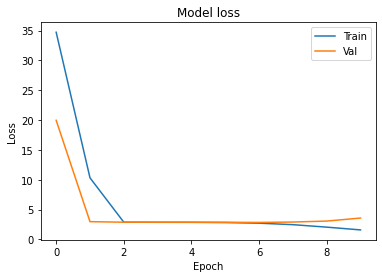

In [0]:
#Visualize the models loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

float32
(215, 215, 4)


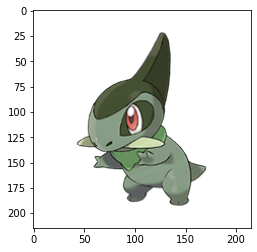

In [0]:
data = (x_test[0])
print(data.dtype)
print(data.shape)
plt.imshow(data)
plt.show()

In [0]:
dat = x_test[0]
probabilities = model.predict(np.array([dat,]))
print(probabilities)
number_to_class = u
index = np.argsort(probabilities[0,:])

[[0.03890413 0.02956396 0.04241013 0.07629336 0.11144447 0.01008766
  0.00698963 0.00642858 0.06527454 0.01461074 0.00365041 0.13496974
  0.00539599 0.00274444 0.03343159 0.00936952 0.03980105 0.36863008]]


In [0]:
print("Most likely class:", number_to_class[index[9]], "-- Probability:", probabilities[0,index[9]])
print("Second most likely class:", number_to_class[index[8]], "-- Probability:", probabilities[0,index[8]])
print("Third most likely class:", number_to_class[index[7]], "-- Probability:", probabilities[0,index[7]])
print("Fourth most likely class:", number_to_class[index[6]], "-- Probability:", probabilities[0,index[6]])
print("Fifth most likely class:", number_to_class[index[5]], "-- Probability:", probabilities[0,index[5]])

Most likely class: Psychic -- Probability: 0.03343159
Second most likely class: Dark -- Probability: 0.029563963
Third most likely class: Grass -- Probability: 0.014610736
Fourth most likely class: Fighting -- Probability: 0.0100876605
Fifth most likely class: Rock -- Probability: 0.009369516


In [0]:
print(np.shape(x_test), np.shape(y_test))

results = model.evaluate(x_test, y_test_one_hot)
print('test loss, test acc:', results)

(241, 215, 215, 4) (241,)
241/241 [==============================] - 5s 20ms/step
test loss, test acc: [3.5137765991242595, 0.07053942233324051]



# Generate predictions for 3 samples


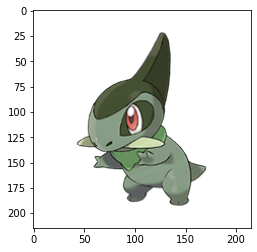

Most likely class:  Psychic -- Probability: 0.03343159


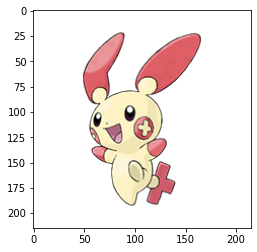

Most likely class:  Bug -- Probability: 0.009213755


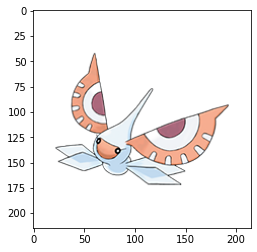

Most likely class:  Poison -- Probability: 0.016687652


In [0]:
print('\n# Generate predictions for 3 samples')

samples = x_test[:3]
predictions = model.predict(x_test[:3])

for i, s in enumerate(samples):
    plt.imshow(s)
    plt.show()
    probabilities = model.predict(np.array([x_test[i]]))
    index = np.argsort(probabilities[0,:])
    print("Most likely class: ", u[index[9]], "-- Probability:", 
          probabilities[0,index[9]])

In [0]:
import keras
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

x_train, x_test, y_train, y_test = train_test_split(imgs, pokemon["type"],
                                                    test_size=0.2, 
                                                    shuffle=True, 
                                                    stratify=pokemon["type"])
y_train_one_hot = np.array(to_categorical(y_train))
y_test_one_hot = np.array(to_categorical(y_test))

x_train = np.array(x_train)
x_test = np.array(x_test)

In [0]:
model2 = Sequential()
model2.add(Conv2D(32, (5, 5), activation='relu', input_shape=(215, 215, 4)))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Conv2D(64, (5, 5), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Flatten())
model2.add(Dense(1000, activation='relu'))
model2.add(Dense(18, activation='softmax'))
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
hist2 = model2.fit(x_train, y_train_one_hot, batch_size=256, epochs=10, validation_split=0.3 )

Train on 674 samples, validate on 289 samples
Epoch 1/10
674/674 [==============================] - 56s 82ms/step - loss: 30.1517 - accuracy: 0.0727 - val_loss: 17.6636 - val_accuracy: 0.0865
Epoch 2/10
674/674 [==============================] - 53s 78ms/step - loss: 11.2563 - accuracy: 0.0831 - val_loss: 3.2828 - val_accuracy: 0.0934
Epoch 3/10
674/674 [==============================] - 52s 78ms/step - loss: 3.0472 - accuracy: 0.1424 - val_loss: 2.9037 - val_accuracy: 0.0657
Epoch 4/10
674/674 [==============================] - 53s 78ms/step - loss: 2.8958 - accuracy: 0.1588 - val_loss: 2.8953 - val_accuracy: 0.0554
Epoch 5/10
674/674 [==============================] - 52s 78ms/step - loss: 2.8900 - accuracy: 0.1172 - val_loss: 2.8923 - val_accuracy: 0.0588
Epoch 6/10
674/674 [==============================] - 52s 78ms/step - loss: 2.8876 - accuracy: 0.0979 - val_loss: 2.8873 - val_accuracy: 0.0865
Epoch 7/10
674/674 [==============================] - 52s 78ms/step - loss: 2.8765 - ac

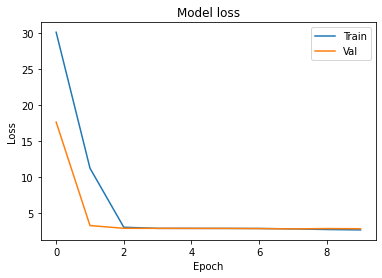

In [0]:
#Visualize the models loss
plt.plot(hist2.history['loss'])
plt.plot(hist2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [0]:
print(np.shape(x_test), np.shape(y_test))

results = model2.evaluate(x_test, y_test_one_hot)
print('test loss, test acc:', results)

(241, 215, 215, 4) (241,)
241/241 [==============================] - 5s 21ms/step
test loss, test acc: [2.853853931070858, 0.08713693171739578]



# Generate predictions for 3 samples


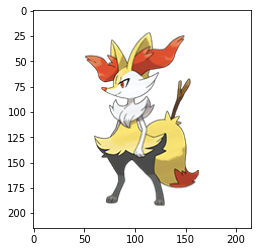

Most likely class:  Rock -- Probability: 0.044676296


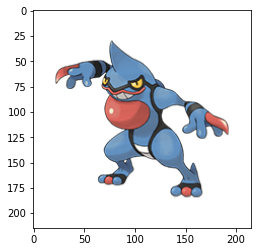

Most likely class:  Fighting -- Probability: 0.05328219


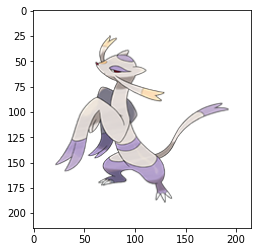

Most likely class:  Dragon -- Probability: 0.046620324


In [0]:
print('\n# Generate predictions for 3 samples')

samples = x_test[:3]
predictions = model.predict(x_test[:3])

for i, s in enumerate(samples):
    plt.imshow(s)
    plt.show()
    probabilities = model2.predict(np.array([x_test[i]]))
    index = np.argsort(probabilities[0,:])
    print("Most likely class: ", u[index[9]], "-- Probability:", probabilities[0,index[9]])

In [ ]:
from google.colab import drive
drive.mount('/content/drive')